# Unsupervised Learning: k-Means Clustering

### The two approaches to modeling data are supervised and unsupervised learning.
### Supervised Learning : Classification, Regression
### Unsupervised Learning: Latent Variables, Clustering 

## Principal Components Analysis 
###  PCA is an example of an unsupervised learning model that can be used for dimensionality reduction, regularization, etc.
###  PCA learns an optimal rotation of the data in high-dimensional space to identify latent variables that have important properties: 
*   #### the latent variables are uncorrelated
*   #### the latent variables are ordered by the amount of variance accounted for. 
### The first property can be useful in further analysis (e.g., classifiers) especially when the number of observations is smaller than the number of variables. 
### The second property can be useful if you want to intepret the latent variables in terms of the mixture of the original variables.  



## Clustering Algorithms 
### Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.
### The important point here is that the labels are not known in advance.  We are trying to learn
* #### What are the statistically meaningful subsets of the data, that we can assign labels to. 
* #### How many such such labels are optimal to model the data. 
### Often, we might examine the properties within each cluster to develop an interpretation of each cluster. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np

## k-Means Clustering

### The *k*-means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset.
### It accomplishes this using a simple conception of what the optimal clustering looks like:

#### - The *cluster center* is the arithmetic mean of all the points belonging to the cluster.
#### - Each point is closer to its own cluster center than to other cluster centers.

### Those two assumptions are the basis of the *k*-means model.

### First, let's generate a two-dimensional dataset containing four distinct clusters of points ("blobs").
### To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization (see the following figure):

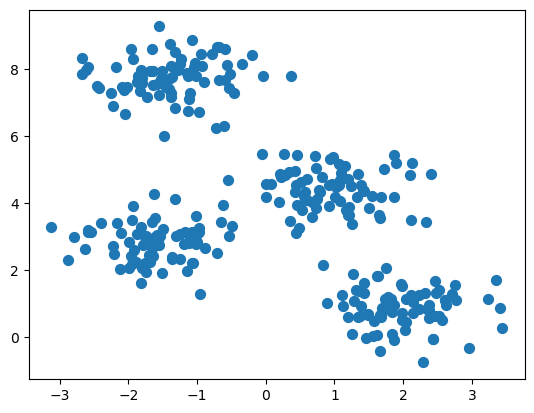

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

### By eye, it is relatively easy to pick out the four clusters.
### The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator syntax:
### Here Im going to cheat, and fit and predict the same data! 

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/home/ramesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's visualize the results by plotting the data colored by these labels (the following figure).
We will also plot the cluster centers as determined by the *k*-means estimator:

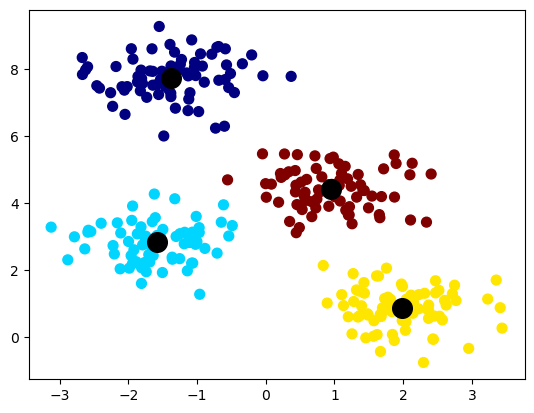

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='jet')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly: after all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization*.

### Expectation–Maximization

### Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
### *k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
### In short, the expectation–maximization approach here consists of the following procedure:

1. #### Guess some cluster centers.
2. #### Repeat until converged:
   * *E-step*: Assign points to the nearest cluster center.
   * *M-step*: Set the cluster centers to the mean of their assigned points.

### Here the *E-step* or *expectation step* is so named because it involves updating our expectation of which cluster each point belongs to.
### The *M-step* or *maximization step* is so named because it involves maximizing some fitness function that defines the locations of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

### The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

### K-mean is the most widely used clustering algorithm, but it has serious weaknesses. 
### The globally optimal result may not be achieved
* #### Although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
### The number of clusters must be selected beforehand
* #### Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.


/home/ramesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


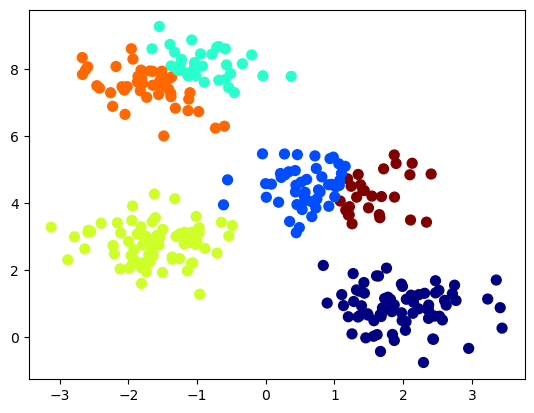

In [5]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='jet');

### k-means can be slow for large numbers of samples
#### Because each iteration of *k*-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.

## Examples

Being careful about these limitations of the algorithm, we can use *k*-means to our advantage in a variety of situations.
We'll now take a look at a couple of examples.

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
images = digits.images
data = digits.data
target = digits.target

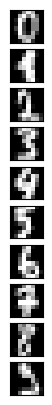

In [10]:
fig, ax = plt.subplots(10, figsize=(12, 5))
for j in range(10):
    ax[j].imshow(images[10+j,:,:],cmap='gray')
    ax[j].set_xticks([])
    ax[j].set_yticks([])

In [11]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
centers = kmeans.cluster_centers_

/home/ramesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### The result is 10 clusters in 64 dimensions.
### Notice that the cluster centers themselves are 64-dimensional points, and can be interpreted as representing the "typical" digit within the cluster.
### Let's see what these cluster centers look like (see the following figure):

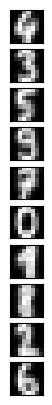

In [12]:
fig, ax = plt.subplots(10, figsize=(12, 5))
centers = centers.reshape(10, 8, 8)
for j in range(10):
    ax[j].set(xticks=[], yticks=[])
    ax[j].imshow(centers[j,:,:],cmap="gray")

### We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

### Because *k*-means knows nothing about the identities of the clusters, the 0–9 labels may be permuted.

### Why am I not bothering with training/test splits of the data? 

### In real applications, I want to use this to "discover" labels.  I want to examine the clusters that are formed and see if I can ascribe meaning to them.  

In [13]:
#In the present case I can evaluate the clusters, by assigning the elements of each cluster to the most common (mode) number found in the cluster. 
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

/tmp/ipykernel_21898/3563366009.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


### k-means clustering performance in finding similar digits within the data:

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

### With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
### Let's check the confusion matrix for this, visualized in the following figure:

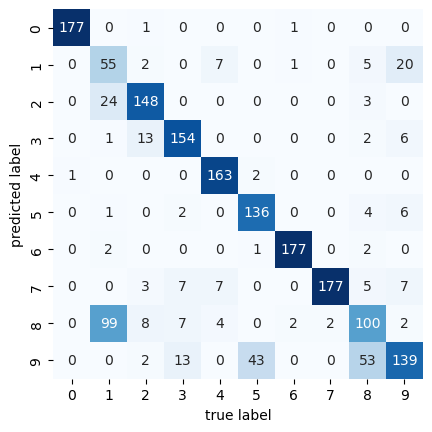

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True,fmt = "d",
            cbar=False, cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');